# Regresión logística con el dataset: Breast Cancer Wisconsin (Diagnostic)

## Librerias

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Pregunta objetivo

Diagnosticar si un tumor es benigno o maligno

## Cargar los datos

### Cargar dataset desde kaggle

In [ ]:
# from google.colab import drive # ¿Es necesario esto?
# drive.mount('/content/gdrive')

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"sepulveda","key":"ed178aa1234f57f134715d7d00bb665a"}'}

In [ ]:
!ls -lha kaggle.json # Making sure that the file is present

-rw-r--r-- 1 root root 65 Dec  7 03:27 kaggle.json


In [ ]:
!pip install -q kaggle # install Kaggle API client

kaggle API client expects the file to be in ~/.kaggle
So we are moving it here

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json # set the permissions

In [ ]:
!pwd

/content


Lista de los dataset disponibles en kaggle

In [ ]:
!kaggle datasets list

ref                                                             title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
meirnizri/covid19-dataset                                       COVID-19 Dataset                                      5MB  2022-11-13 15:47:17           5846        176  1.0              
madhurpant/world-deaths-and-causes-1990-2019                    World Deaths and Causes (1990 - 2019)               442KB  2022-11-29 07:09:27            965         23  1.0              
thedevastator/jobs-dataset-from-glassdoor                       Salary Prediction                                     3MB  2022-11-16 13:52:31           3868         89  1.0              
thedevastator/how-much-sleep-do-americans-really-get        

In [ ]:
!kaggle datasets download -d uciml/breast-cancer-wisconsin-data

breast-cancer-wisconsin-data.zip: Skipping, found more recently modified local copy (use --force to force download)


Por ultimo descomprimir los datos

In [ ]:
!unzip breast-cancer-wisconsin-data.zip

Archive:  breast-cancer-wisconsin-data.zip
replace data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


### Cargar el datset en memoria

In [ ]:
df_data = pd.read_csv('./data.csv')
df_data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df_data.shape

(569, 33)

Tenemos 569 muestras con 33 variables.

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Una de las ventajas de trabajar dataset de kaggle es que ya estan procesados como vemos aquí, no tenemos ningun dato nulo en las 33 muestras.

Nuestra variable objetivo es diagnosis, es de tipo object, hay que convertirla a numero y separarla de nuestro dataset.

## Limpieza y preprocesamiento de datos

Para corroborar que no tenemos ningun valor nulo

In [ ]:
df_data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

Primero vamos a cambiar nuestra variable objetivo a numerica. Un paso necesario ya que los modelos de machien learning solo trabajan con numeros

In [ ]:
df_data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [ ]:
df_data['diagnosis'].replace(to_replace='M', value=0, inplace=True)
df_data['diagnosis'].replace(to_replace='B', value=1, inplace=True)

In [ ]:
df_data['diagnosis'].unique()

array([0, 1])

Ahora vamos a quitar la varaibles que son irrelevantes como: Unnamed:32 y el id

In [ ]:
df_data.drop('Unnamed: 32',axis=1,inplace=True)
df_data.drop('id',axis=1,inplace=True)

##  Analisis exploratorio

Viendo el analisis exploratorio me di cuenta que tengo variables dummy, como el id y el unnmaed.

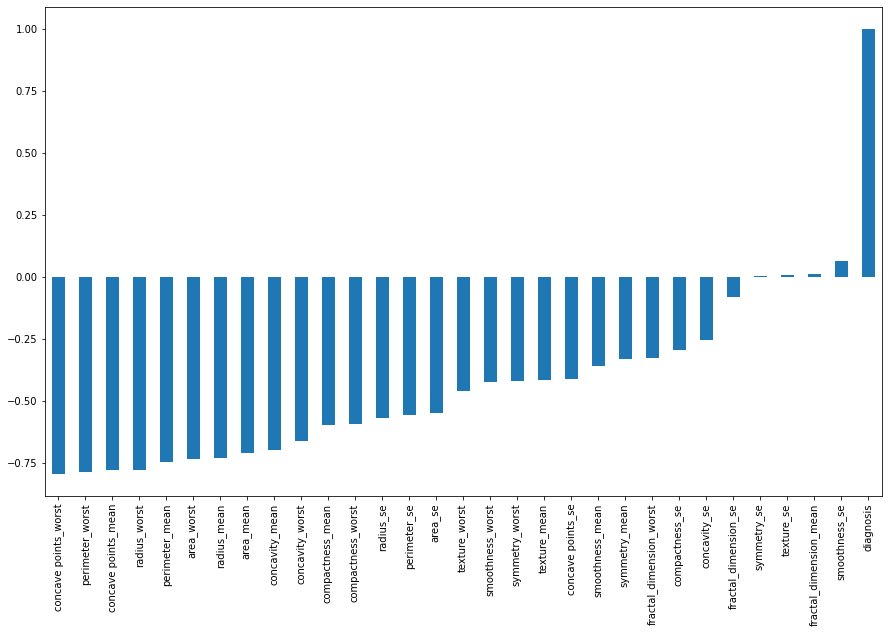

In [ ]:
fig = plt.figure(figsize=(15,9))
df_data.corr()['diagnosis'].sort_values(ascending=True).plot(kind='bar')
plt.show()

In [ ]:
df_data.corr()['diagnosis'].sort_values(ascending=True)

concave points_worst      -0.793566
perimeter_worst           -0.782914
concave points_mean       -0.776614
radius_worst              -0.776454
perimeter_mean            -0.742636
area_worst                -0.733825
radius_mean               -0.730029
area_mean                 -0.708984
concavity_mean            -0.696360
concavity_worst           -0.659610
compactness_mean          -0.596534
compactness_worst         -0.590998
radius_se                 -0.567134
perimeter_se              -0.556141
area_se                   -0.548236
texture_worst             -0.456903
smoothness_worst          -0.421465
symmetry_worst            -0.416294
texture_mean              -0.415185
concave points_se         -0.408042
smoothness_mean           -0.358560
symmetry_mean             -0.330499
fractal_dimension_worst   -0.323872
compactness_se            -0.292999
concavity_se              -0.253730
fractal_dimension_se      -0.077972
symmetry_se                0.006522
texture_se                 0

Ahora vamos a escalar los datos

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_data_processing_scaled =  scaler.fit_transform(df_data)
df_data_processing_scaled = pd.DataFrame(df_data_processing_scaled)
df_data_processing_scaled.columns = df_data.columns
df_data_processing_scaled.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.0,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.0,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.0,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.0,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


In [ ]:
# fig = plt.figure(figsize=(10,10))
# sns.pairplot(data=df_data)
# plt.show()

Ahora vamos a separar la variable objetivo del resto de los datos

In [ ]:
X = df_data_processing_scaled.drop('diagnosis',axis=1)
y = df_data_processing_scaled['diagnosis'].values

In [ ]:
X.shape, y.shape

((569, 30), (569,))

Hay que dividir los datos en test y entrenamiento

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Entrenamiento

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

## Validación

In [ ]:
from sklearn import metrics
prediction_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, prediction_test ))

0.9766081871345029


97% de precisión.
Ahora vamos a ver un poco como quedo el entrenamiento.

In [ ]:
model.coef_

array([[-1.64007217, -1.46893324, -1.60642229, -1.40205492, -0.63380239,
        -0.334529  , -1.33551108, -2.03333012, -0.41711154,  0.84752298,
        -1.12484985, -0.0685475 , -0.84732831, -0.73961645, -0.00911603,
         0.49938183,  0.18313026, -0.29647412,  0.2322643 ,  0.59318976,
        -2.06103544, -2.08993358, -1.86669948, -1.48502344, -1.31045546,
        -0.78141258, -1.4011101 , -2.44998273, -1.29491442, -0.22237539]])

In [ ]:
model.feature_names_in_

array(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se',
       'smoothness_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'symmetry_se', 'fractal_dimension_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst'], dtype=object)

Las dos grafica siguiete es para ver el graficamente el valor de los pesos de cada variable en el modelo.

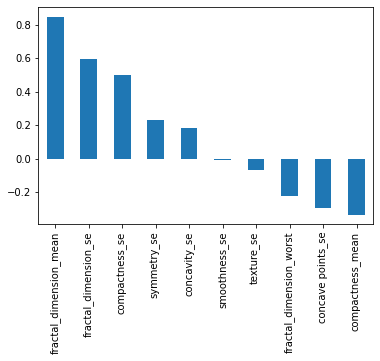

In [ ]:
weights = pd.Series(
    model.coef_[0],
    index=X.columns.values
) 
weights.sort_values(ascending=False)[:10].plot(kind='bar')

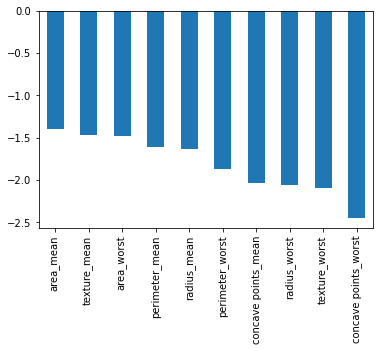

In [ ]:
weights.sort_values(ascending=False)[-10:].plot(kind='bar')

<Figure size 792x792 with 0 Axes>

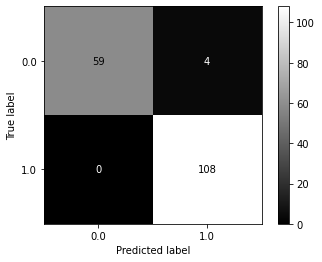

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig = plt.figure(figsize=(11,11))
cm = confusion_matrix(y_test, prediction_test, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_)
disp.plot(cmap='gray')
plt.show()

La gráfica anterior nos dice que 59 veces acertó cuando se trataba de un tumor maligno (es el 0) y 4 veces se equivocó. Acertó 108 veces que se trataba de un tumor benigno y se equivocó 0 veces.


En este primer intento, el modelo de regresión logística, me di cuenta de que no revise si los datos no estaban balanceados, dado que tenemos poco más de la mitad para los datos de un diagnóstico de 0.